# Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import shap
import numpy as np

# using panda read file

In [2]:
hr = pd.read_csv(r"C:\Users\nithi\Downloads\archive (4)\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Check for null and duplicated values

In [4]:
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
hr.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [6]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# Created exploratory plots using Python libraries to understand feature distributions and relationships.


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Line plot to show age-wise counts of  people in an organisation

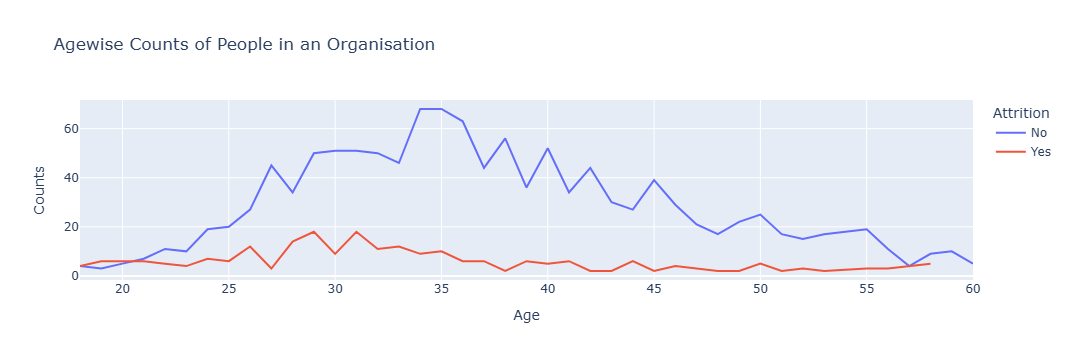

In [31]:

age=hr.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(age,x='Age',y='Counts',color='Attrition',title='Agewise Counts of People in an Organisation')

# Line plot for monthly income basics, counts of people in an organisation

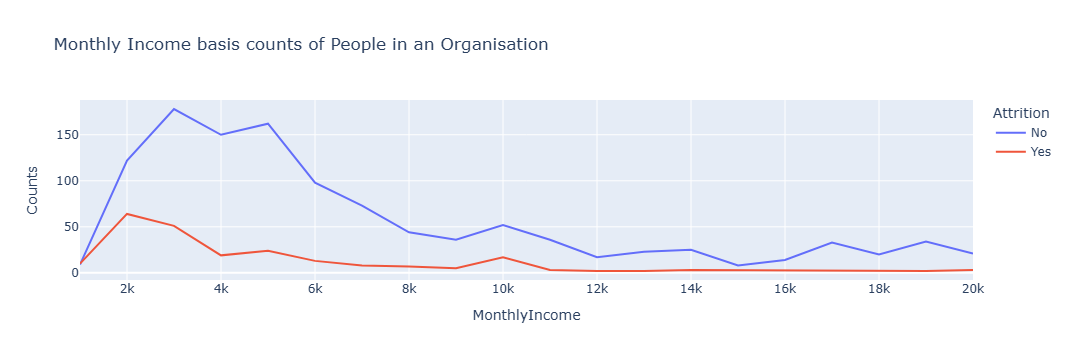

In [32]:
rate=hr.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
rate['MonthlyIncome']=round(rate['MonthlyIncome'],-3)
rate=rate.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
fig=px.line(rate,x='MonthlyIncome',y='Counts',color='Attrition',title='Monthly Income basis counts of People in an Organisation')
fig.show()

# Bar plot shows the department wise counts of people in an organisation

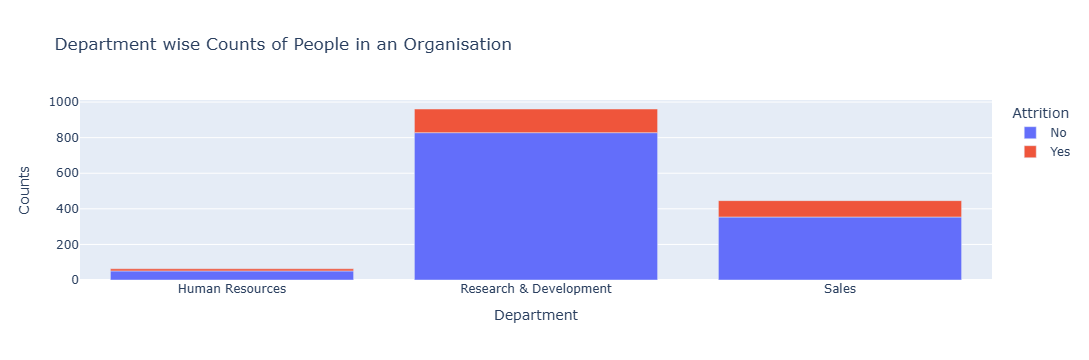

In [33]:
dept=hr.groupby(['Department','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
fig=px.bar(dept,x='Department',y='Counts',color='Attrition',title='Department wise Counts of People in an Organisation')
fig.show()

# Area describes the environmental satisfaction level and the number of people in an organisation

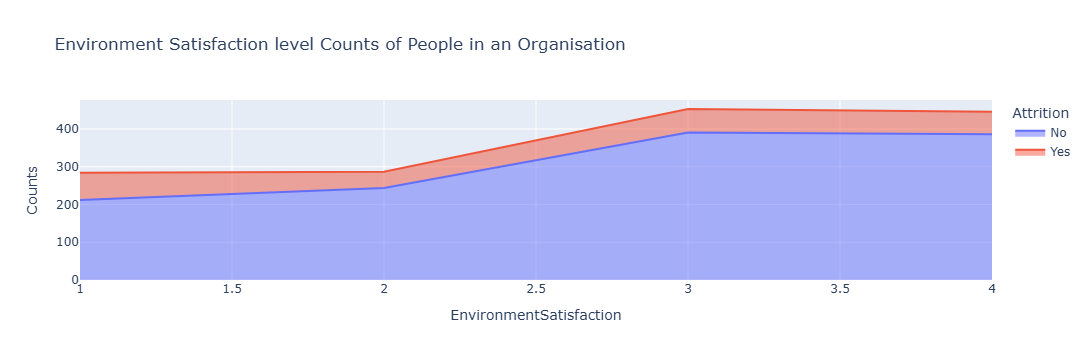

In [35]:
sats=hr.groupby(['EnvironmentSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(sats,x='EnvironmentSatisfaction',y='Counts',color='Attrition',title='Environment Satisfaction level Counts of People in an Organisation')

# Area plot shows the job satisfaction level counts of people in an organisation

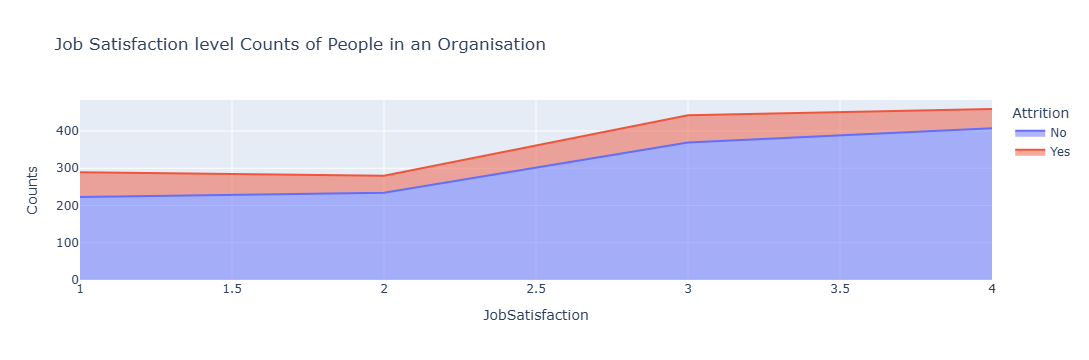

In [36]:
jsats=hr.groupby(['JobSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(jsats,x='JobSatisfaction',y='Counts',color='Attrition',title='Job Satisfaction level Counts of People in an Organisation')

# bar plot shows the stock facilities level-wise people in an organisation

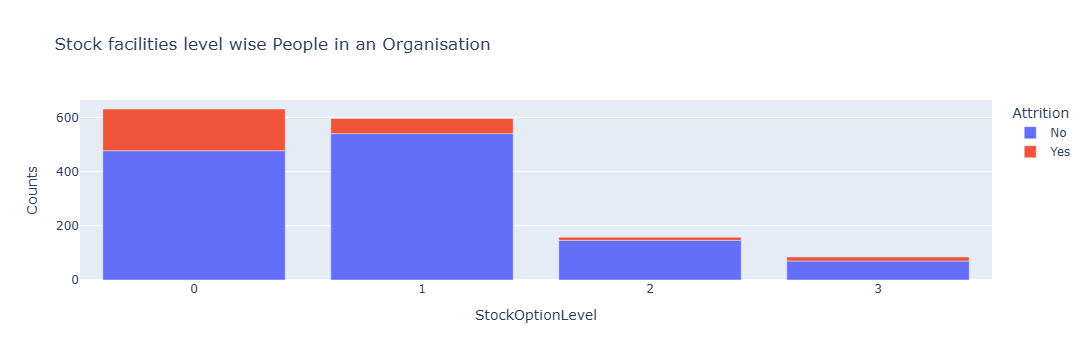

In [37]:
stock=hr.groupby(['StockOptionLevel','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.bar(stock,x='StockOptionLevel',y='Counts',color='Attrition',title='Stock facilities level wise People in an Organisation')

## Use a bar plot to show the work-life balance level counts of people in an organisation

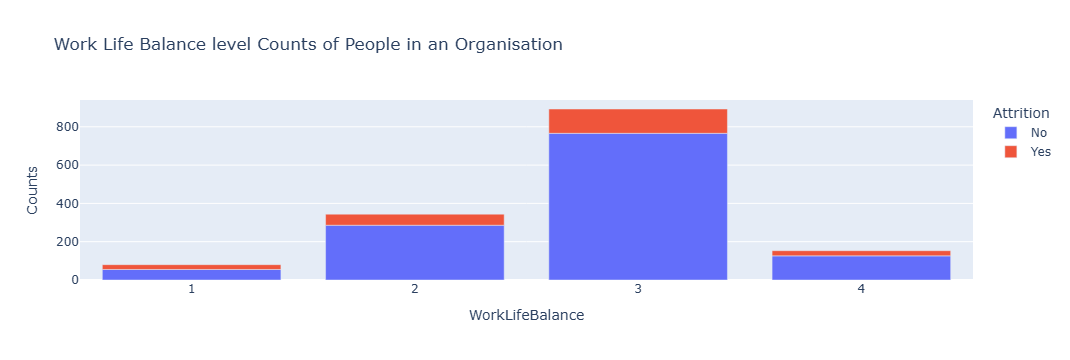

In [38]:
wlb=hr.groupby(['WorkLifeBalance','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.bar(wlb,x='WorkLifeBalance',y='Counts',color='Attrition',title='Work Life Balance level Counts of People in an Organisation')

# Area plot to show the work experience level counts of people

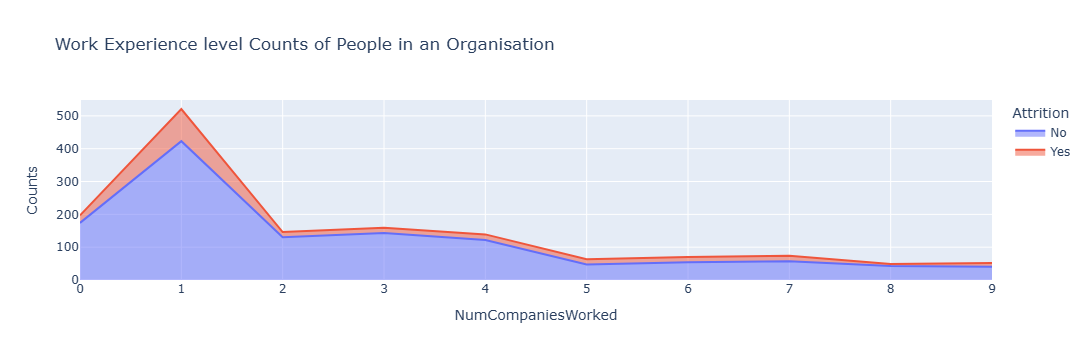

In [39]:
ncwrd=hr.groupby(['NumCompaniesWorked','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(ncwrd,x='NumCompaniesWorked',y='Counts',color='Attrition',title='Work Experience level Counts of People in an Organisation')

# line plot shows the counts of people working for years

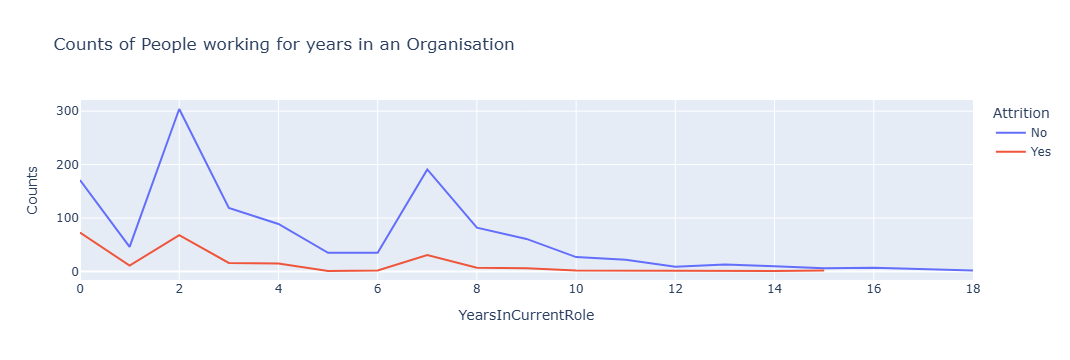

In [40]:
yrscr=hr.groupby(['YearsInCurrentRole','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(yrscr,x='YearsInCurrentRole',y='Counts',color='Attrition',title='Counts of People working for years in an Organisation')

# line to count of hike percentages people receive in an organisation 

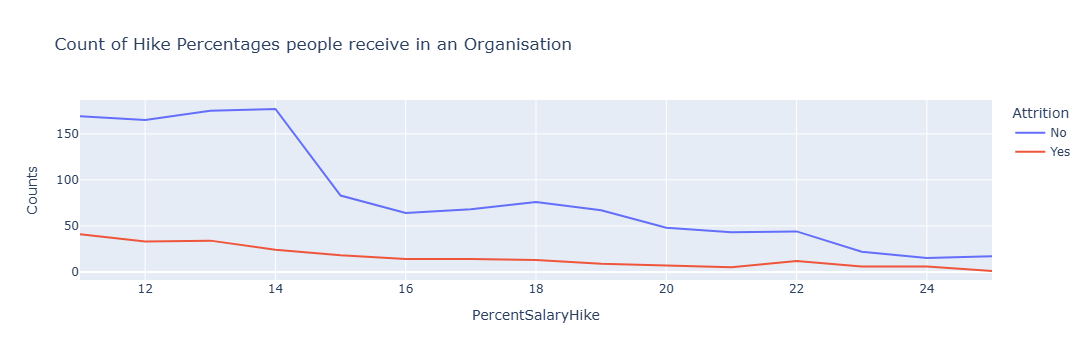

In [41]:
hike=hr.groupby(['PercentSalaryHike','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(hike,x='PercentSalaryHike',y='Counts',color='Attrition',title='Count of Hike Percentages people receive in an Organisation')

# Use a line plot to show the count of people spending years with a manager 

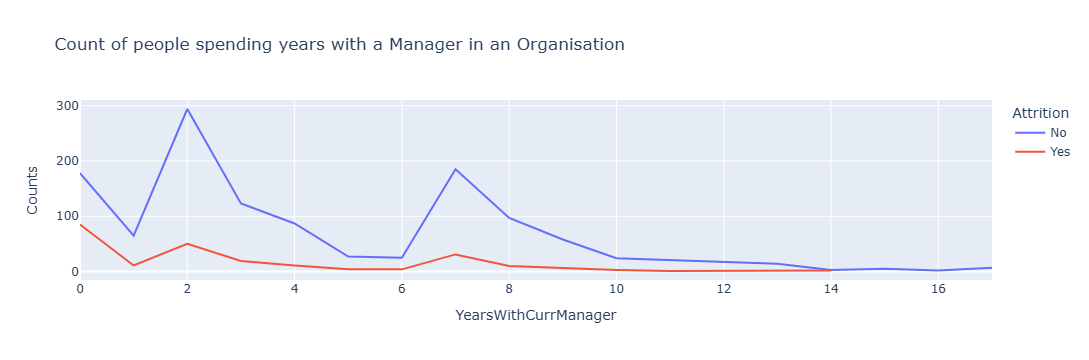

In [42]:
man=hr.groupby(['YearsWithCurrManager','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(man,x='YearsWithCurrManager',y='Counts',color='Attrition',title='Count of people spending years with a Manager in an Organisation')

## Use heat map to visualize the correlation between numerical features in the HR dataset

<AxesSubplot:>

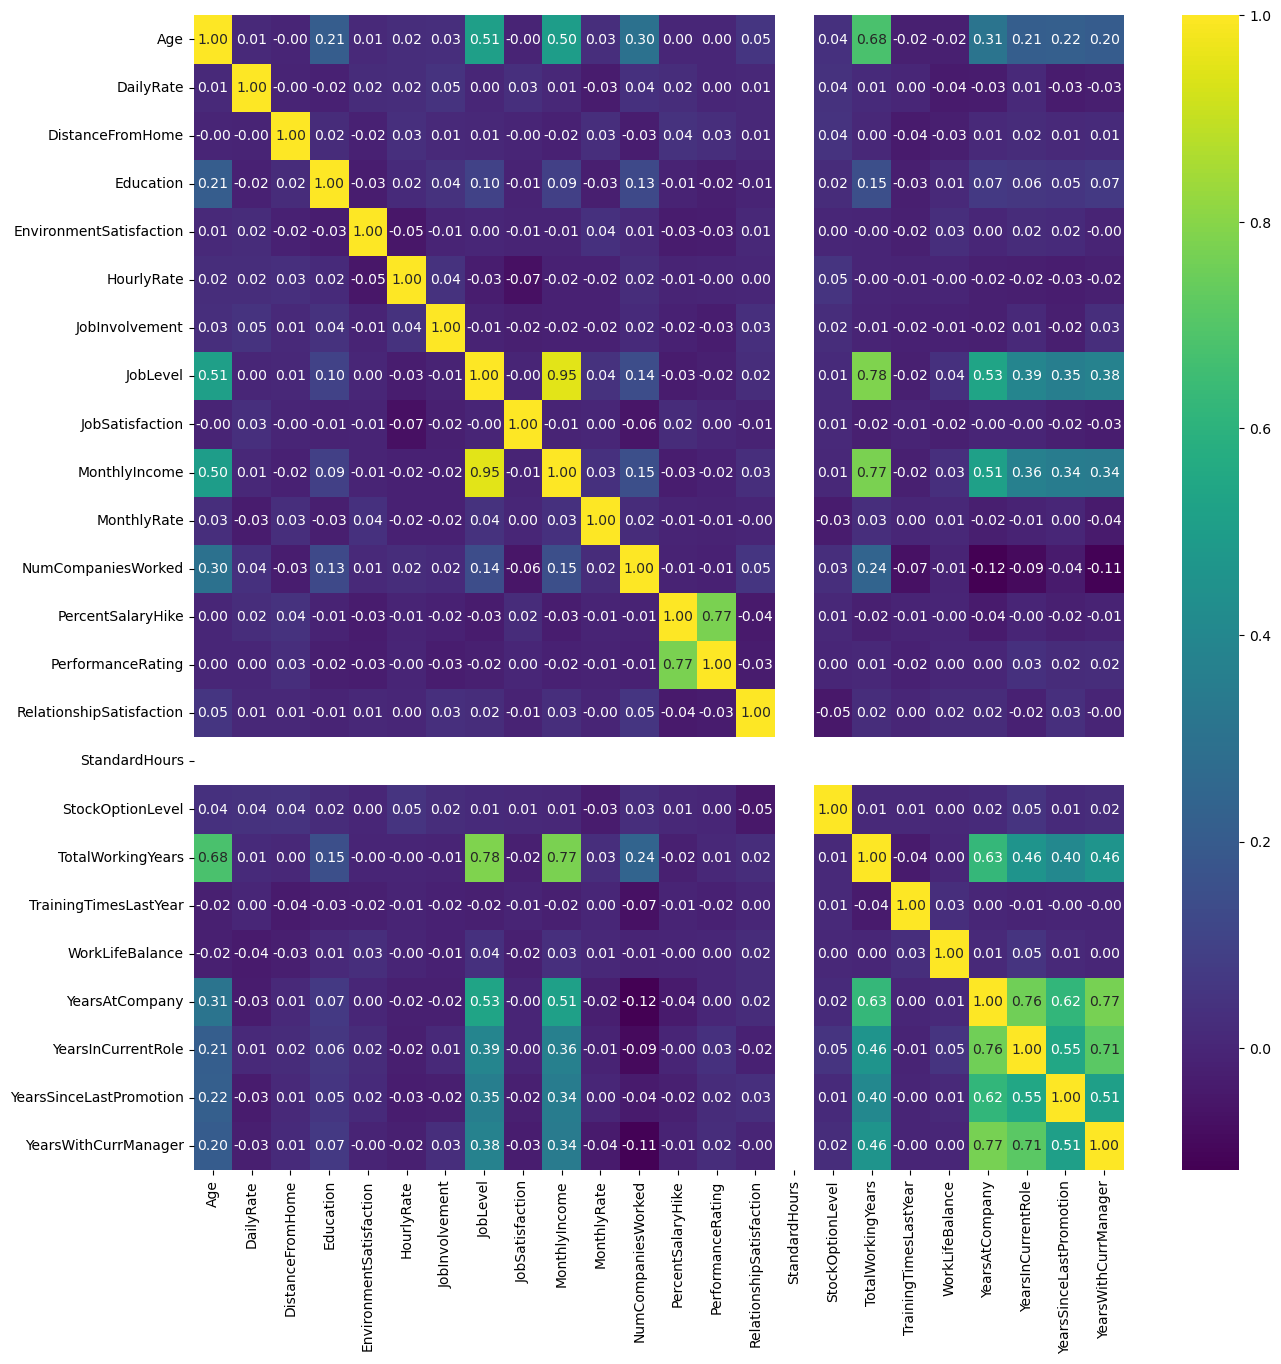

In [20]:
X=hr[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y=hr[['Attrition']].values.ravel()
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True,fmt='.2f',cmap='viridis')

# Build logistic regression model

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [22]:
X=hr[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y=hr[['Attrition']].values.ravel()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
log_reg=LogisticRegression(C=1000,max_iter=10000)
log_reg.fit(X_train,y_train)
print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print('Traning Model accruracy scores: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(log_reg.score(X_test,y_test)))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Logistic Regression:
Traning Model accruracy scores: 0.856
Test Model accruracy scores: 0.840
--------------------------------------------------------------------------


In [23]:
hr_dummies=pd.get_dummies(hr)
features=hr_dummies[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Over18_Y',
       'OverTime_No', 'OverTime_Yes']]
X=features.values
y=hr_dummies[['Attrition_Yes']].values.ravel()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
log_reg=LogisticRegression(C=1000,max_iter=10000)
log_reg.fit(X_train,y_train)
print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print('Traning Model accruracy scores: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(log_reg.score(X_test,y_test)))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Logistic Regression:
Traning Model accruracy scores: 0.896
Test Model accruracy scores: 0.894
--------------------------------------------------------------------------


In [24]:
feature_names = features.columns
X_test_df = pd.DataFrame(X_test, columns=feature_names)


# Calculate SHAP values for test data

In [25]:
explainer = shap.LinearExplainer(log_reg, X_train, feature_perturbation="interventional")

shap_values = explainer.shap_values(X_test)

C:\Users\nithi\anaconda3\lib\site-packages\shap\explainers\_linear.py:99: FutureWarning:

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).



# Summary plot (shows impact of all features)

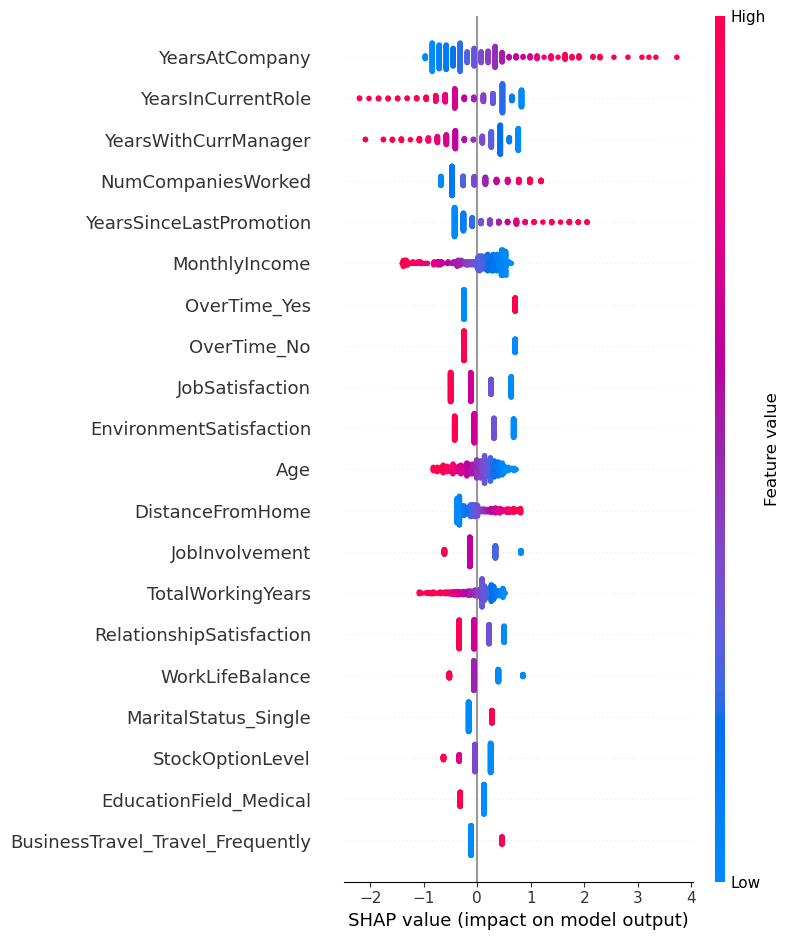

In [26]:
# Summary plot (shows impact of all features)
shap.summary_plot(shap_values, X_test_df)


# This shows which features have the largest average influence on predictions.

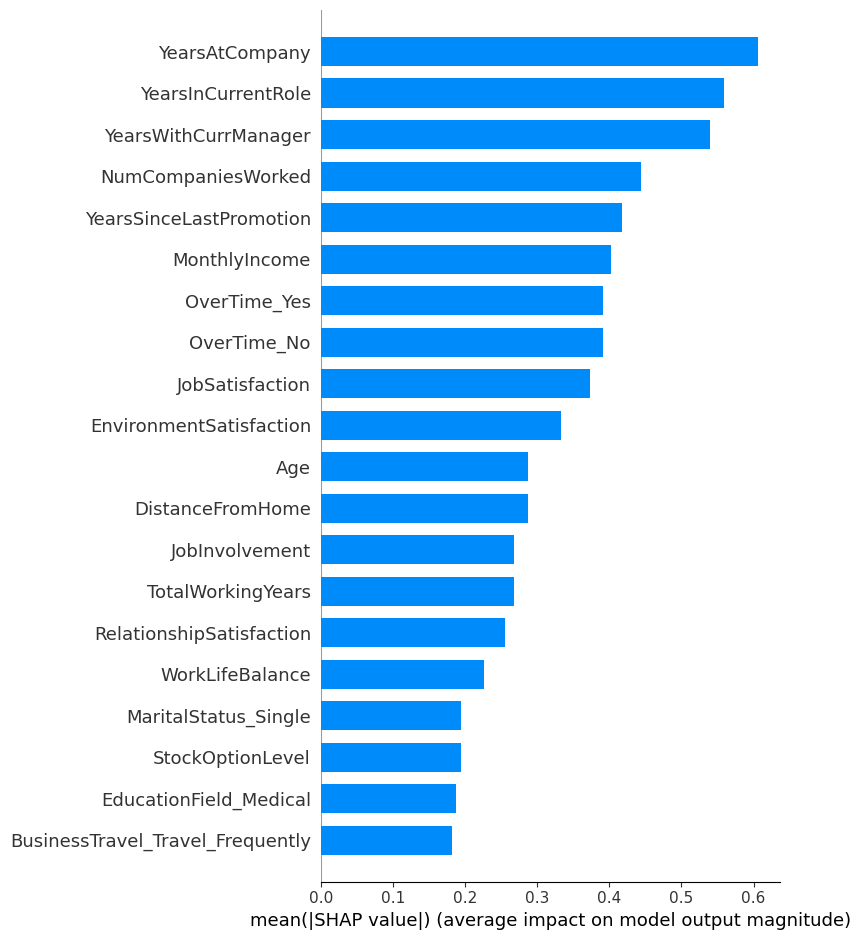

In [27]:
shap.summary_plot(shap_values, X_test_df, plot_type="bar")


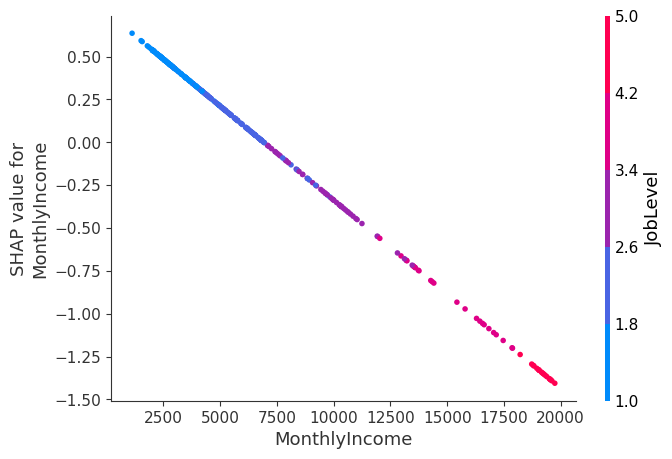

In [28]:
# To see how one feature affects the prediction (and interacts with another):

shap.dependence_plot("MonthlyIncome", shap_values, X_test_df)

# his helps you understand how higher or lower MonthlyIncome influences attrition risk.

In [29]:

importance_df = pd.DataFrame({
    'feature': feature_names,
    'mean_abs_SHAP': np.abs(shap_values).mean(axis=0)
}).sort_values(by='mean_abs_SHAP', ascending=False)

print(importance_df.head(10))


                    feature  mean_abs_SHAP
22           YearsAtCompany       0.606230
23       YearsInCurrentRole       0.559616
25     YearsWithCurrManager       0.539730
13       NumCompaniesWorked       0.443546
24  YearsSinceLastPromotion       0.418174
11            MonthlyIncome       0.402307
54             OverTime_Yes       0.391413
53              OverTime_No       0.390999
10          JobSatisfaction       0.372733
6   EnvironmentSatisfaction       0.333111
